# SOLO PARA LAS SUBTASKS DEL TIPO A

In [1]:
import os
import glob
import json

# Para ver las métricas, basta cambiar la task realizada (task1 o task2) y el nombre del clasificador utilizado en la celda de abajo, luego correr todo el notebook


In [2]:
## Basta con cambiar los valores de esta celda y correr todo
TASK = "task2"
clf_name="MNB"

In [3]:
SUBTASK = f"{TASK}a"
PREDICTION_FILE = f"predictions_{TASK}.json"

In [4]:
data_path = os.path.join("data",TASK,"trial",)
user_files = glob.glob(os.path.join(data_path, "*.txt"))

In [5]:
truth = [file for file in user_files if SUBTASK in file]

In [6]:
gold_truth_dict = {}
with open(truth[0], "r",) as f:
    for line in f.readlines()[1:]:
        subject = line.strip().split(",")[0]
        label = line.strip().split(",")[1]
        gold_truth_dict[subject] = int(label)

In [7]:
gold_truth_list = sorted([[key, value] for key, value in gold_truth_dict.items()])
gold_truth_list
gold_truth = [elem[1] for elem in gold_truth_list]

In [8]:
with open(PREDICTION_FILE, "r",) as f:
    prediction_data = json.load(f)[SUBTASK]

In [9]:
from sklearn.metrics import classification_report

rounds = prediction_data.keys()
metrics = {}


for round_number in rounds:
    print(f"Procesando round --- {round_number}")
    run0_data = prediction_data[round_number]["0"][0]
    predictions_dict = run0_data["predictions"]
    emissions_dict = run0_data["emissions"]
    predictions_list = sorted([[key, value] for key, value in predictions_dict.items()])
    ypred = [elem[1] for elem in predictions_list]
    clf_report = classification_report(gold_truth, ypred, output_dict=True)
    metrics[round_number] = clf_report
    

Procesando round --- 0
Procesando round --- 1
Procesando round --- 2
Procesando round --- 3
Procesando round --- 4
Procesando round --- 5
Procesando round --- 6
Procesando round --- 7
Procesando round --- 8
Procesando round --- 9
Procesando round --- 10
Procesando round --- 11
Procesando round --- 12
Procesando round --- 13
Procesando round --- 14
Procesando round --- 15
Procesando round --- 16
Procesando round --- 17
Procesando round --- 18
Procesando round --- 19
Procesando round --- 20
Procesando round --- 21
Procesando round --- 22
Procesando round --- 23
Procesando round --- 24
Procesando round --- 25
Procesando round --- 26
Procesando round --- 27
Procesando round --- 28
Procesando round --- 29
Procesando round --- 30
Procesando round --- 31
Procesando round --- 32
Procesando round --- 33
Procesando round --- 34
Procesando round --- 35
Procesando round --- 36
Procesando round --- 37
Procesando round --- 38
Procesando round --- 39
Procesando round --- 40
Procesando round --- 41
Pr

In [10]:
metrics

{'0': {'0': {'precision': 0.3333333333333333,
   'recall': 0.25,
   'f1-score': 0.28571428571428575,
   'support': 4},
  '1': {'precision': 0.5714285714285714,
   'recall': 0.6666666666666666,
   'f1-score': 0.6153846153846153,
   'support': 6},
  'accuracy': 0.5,
  'macro avg': {'precision': 0.45238095238095233,
   'recall': 0.4583333333333333,
   'f1-score': 0.4505494505494505,
   'support': 10},
  'weighted avg': {'precision': 0.47619047619047616,
   'recall': 0.5,
   'f1-score': 0.48351648351648346,
   'support': 10}},
 '1': {'0': {'precision': 0.5,
   'recall': 0.25,
   'f1-score': 0.3333333333333333,
   'support': 4},
  '1': {'precision': 0.625,
   'recall': 0.8333333333333334,
   'f1-score': 0.7142857142857143,
   'support': 6},
  'accuracy': 0.6,
  'macro avg': {'precision': 0.5625,
   'recall': 0.5416666666666667,
   'f1-score': 0.5238095238095238,
   'support': 10},
  'weighted avg': {'precision': 0.575,
   'recall': 0.6,
   'f1-score': 0.5619047619047619,
   'support': 10}},

In [11]:
#graficar
import matplotlib.pyplot as plt

def plot_metric(metrics, clf_name, key, subkey):
    '''
    lista_dict_metric: lista de diccionarios con las métrica
    list_clf_names: nombres de los clasificadores
    key: primera key de la métrica
    subkey: segunda key del diccionario
    '''
    values = []
    for round_number in rounds:
        metric_per_round = metrics[round_number]
        if key == 'accuracy':
            values.append(metric_per_round[key])
            subkey = ""
        else:
            values.append(metric_per_round[key][subkey])

    plt.plot( values, label = clf_name)
    plt.title('Classifier:' + clf_name + '| Metric: ' + key + '-' + subkey )
    plt.xlabel('N Round')
    plt.ylabel(key + '-' + subkey)
    plt.legend(loc = "lower right")
    plt.grid()

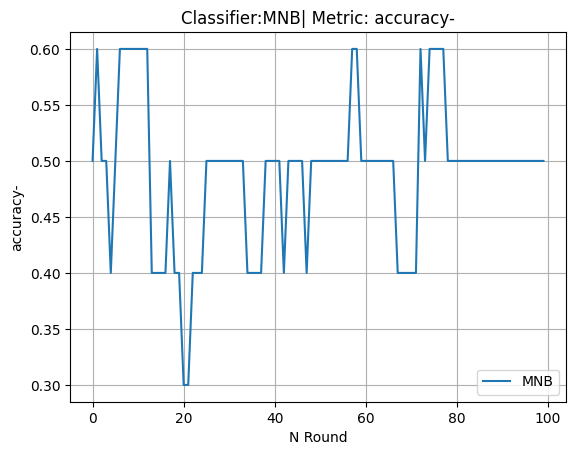

In [12]:
key = "accuracy"
subkey = ""

plot_metric(metrics=metrics, clf_name=clf_name, key=key, subkey=subkey)

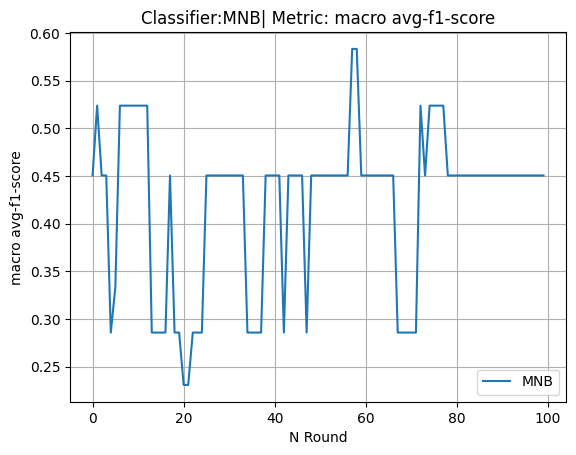

In [13]:
key = "macro avg"
subkey = "f1-score"

plot_metric(metrics=metrics, clf_name=clf_name, key=key, subkey=subkey)

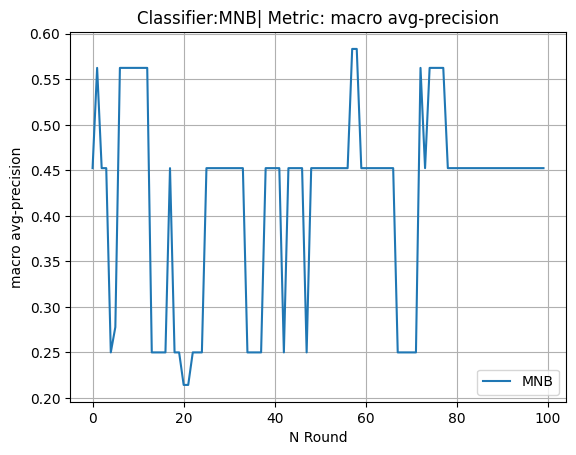

In [14]:
key = "macro avg"
subkey = "precision"

plot_metric(metrics=metrics, clf_name=clf_name, key=key, subkey=subkey)

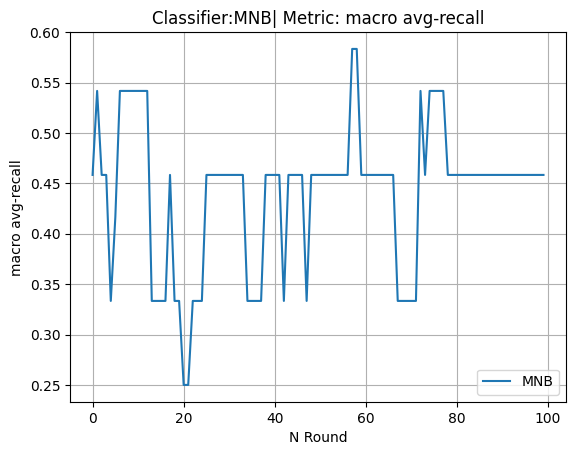

In [15]:
key = "macro avg"
subkey = "recall"

plot_metric(metrics=metrics, clf_name=clf_name, key=key, subkey=subkey)

In [16]:
import pprint
pprint.pprint(metrics[str(len(metrics) - 1)])

{'0': {'f1-score': 0.28571428571428575,
       'precision': 0.3333333333333333,
       'recall': 0.25,
       'support': 4},
 '1': {'f1-score': 0.6153846153846153,
       'precision': 0.5714285714285714,
       'recall': 0.6666666666666666,
       'support': 6},
 'accuracy': 0.5,
 'macro avg': {'f1-score': 0.4505494505494505,
               'precision': 0.45238095238095233,
               'recall': 0.4583333333333333,
               'support': 10},
 'weighted avg': {'f1-score': 0.48351648351648346,
                  'precision': 0.47619047619047616,
                  'recall': 0.5,
                  'support': 10}}
